In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Loading the dataset.
df = pd.read_csv("/content/insurance.csv")

# Exploratory Data Analysis


In [87]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [89]:
# Information about dataset.
# Dataset does not have any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [90]:
# Cross verifying the null values.
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [91]:
# Statistical summary of numerical attributes.
df[["age", "bmi", "children", "charges"]].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
"""
Independent Columns ---> ["age", "bmi", "children", "charges"]
Dependent Column ---> ["charges"]
"""

'\nIndependent Columns ---> ["age", "bmi", "children", "charges"]\nDependent Column ---> ["charges"]\n'

In [93]:
# Analyzing age column
print("Minimun age: ", df["age"].min())
print("Maximum age: ", df["age"].max())
print("Mean age: ", round(df["age"].mean(), 2))

Minimun age:  18
Maximum age:  64
Mean age:  39.21


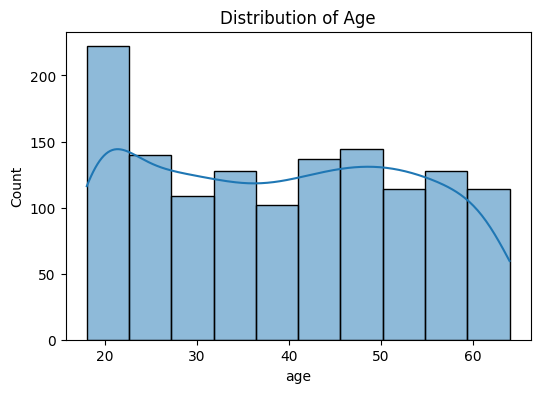

In [94]:
# Age column is sort of uniformly distributed, with a spike.
plt.figure(figsize= (6, 4))
sns.histplot(df["age"], kde= True, bins= 10)
plt.title("Distribution of Age")
plt.show()

In [95]:
# Analysing the sex column.
df["sex"].value_counts()

,count
sex,
male,676
female,662


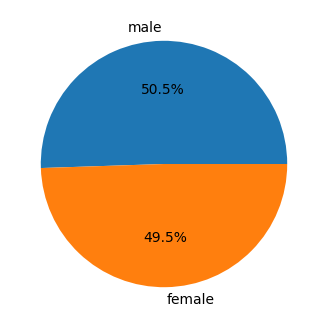

In [96]:
plt.figure(figsize= (4, 4))
plt.pie(df["sex"].value_counts(), labels= df["sex"].value_counts().index, autopct= "%0.1f%%")
plt.show()

In [97]:
# Analysing the bmi column.
print("Minimun bmi: ", df["bmi"].min())
print("Maximum bmi: ", df["bmi"].max())
print("Mean bmi: ", round(df["bmi"].mean(), 2))

Minimun bmi:  15.96
Maximum bmi:  53.13
Mean bmi:  30.66


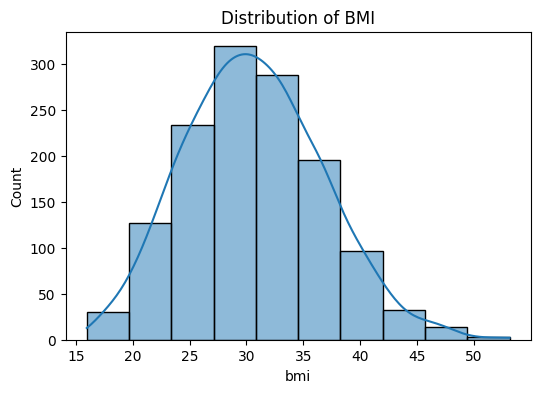

In [98]:
# BMI column is normally distributed.
plt.figure(figsize= (6, 4))
sns.histplot(df["bmi"], kde= True, bins= 10)
plt.title("Distribution of BMI")
plt.show()

In [99]:
# Analysing the children column.
print("Minimun children: ", df["children"].min())
print("Maximum children: ", df["children"].max())
print("Mean children: ", round(df["children"].mean(), 2))

Minimun children:  0
Maximum children:  5
Mean children:  1.09


In [100]:
# Analysing the smoker column.
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


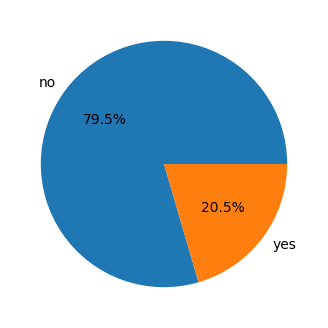

In [101]:
plt.figure(figsize= (4, 4))
plt.pie(df["smoker"].value_counts(), labels= df["smoker"].value_counts().index, autopct= "%0.1f%%")
plt.show()

In [102]:
# Analysing the region column.
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


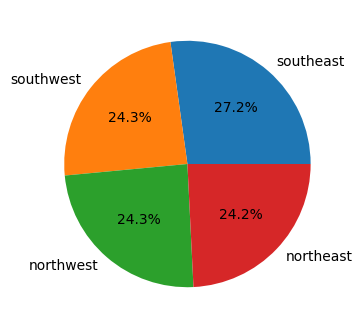

In [103]:
plt.figure(figsize= (4, 4))
plt.pie(df["region"].value_counts(), labels= df["region"].value_counts().index, autopct= "%0.1f%%")
plt.show()

In [104]:
# Checking the correlation between the attributes.
df[["age", "bmi", "children", "charges"]].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


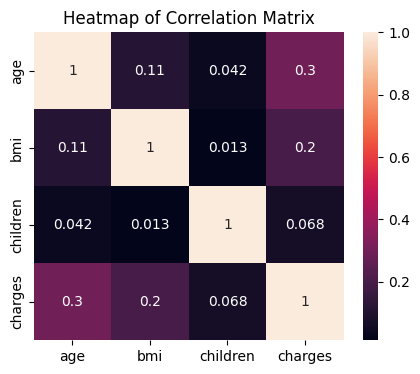

---------------------------------------------------------------------------------------------------------------------------------------
Observations: 
1. There is a moderate positive correlation between age and charges. This suggests that older individuals tend to have higher charges.
2. A weak positive correlation between BMI and charges indicates that as BMI increases, charges tend to increase slightly.
3. Almost no correlation between number of children and charges suggests that having more children does not significantly impact charges.
4. Very weak correlations, meaning that age does not strongly influence BMI or the number of children.
5. Almost no correlation, meaning BMI and number of children are independent.
---------------------------------------------------------------------------------------------------------------------------------------
Based on the correlation matrix, this dataset does not have the issue of multicollinearity.


In [105]:
plt.figure(figsize= (5, 4))
sns.heatmap(df[["age", "bmi", "children", "charges"]].corr(), annot= True)
plt.title("Heatmap of Correlation Matrix")
plt.show()
print("---------------------------------------------------------------------------------------------------------------------------------------")
print("Observations: ")
print("1. There is a moderate positive correlation between age and charges. This suggests that older individuals tend to have higher charges.")
print("2. A weak positive correlation between BMI and charges indicates that as BMI increases, charges tend to increase slightly.")
print("3. Almost no correlation between number of children and charges suggests that having more children does not significantly impact charges.")
print("4. Very weak correlations, meaning that age does not strongly influence BMI or the number of children.")
print("5. Almost no correlation, meaning BMI and number of children are independent.")
print("---------------------------------------------------------------------------------------------------------------------------------------")

print("Based on the correlation matrix, this dataset does not have the issue of multicollinearity.")

# Data Preprocessing

In [106]:
# Categorical attributes.
df[["sex", "smoker", "region"]].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [107]:
# Creating a copy of original data.
copy_of_original = df.copy()

In [109]:
# Performing the One Hot Encoding.
# Converting the categorical values into numerical values.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop= "first", sparse_output= False)
encoded_sex = encoder.fit_transform(df[["sex"]])
encoded_smoker = encoder.fit_transform(df[["smoker"]])
encoded_region = encoder.fit_transform(df[["region"]])

df["sex"] = encoded_sex
df["smoker"] = encoded_smoker
df["region"] = encoded_region

In [110]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,0.0,16884.92400
1,18,1.0,33.770,1,0.0,0.0,1725.55230
2,28,1.0,33.000,3,0.0,0.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


# Splitting The Data

In [116]:
# Extracting the independent and dependent columns.
# Independent columns.
x = df.iloc[:, 0:6]
y = df.iloc[:, 6:]

In [117]:
# Spliting the dataset.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.2, random_state= 42)

# Build the Regression Model

In [119]:
# Building the regression model.
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [120]:
# Training the model.
model = model.fit(x_train, y_train)

In [123]:
# Making prediction.
y_pred = model.predict(x_test)
y_pred

array([[ 8295.96172483],
       [ 7336.4011268 ],
       [37932.39551868],
       ...,
       [ 9733.17654533],
       [12861.74422643],
       [10244.15735905]])

In [124]:
y_test.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [127]:
# Coefficients.
print("Intercept: ", model.intercept_)
print("Slopes: ", model.coef_)

Intercept:  [-13278.43927325]
Slopes:  [[  245.98069408  -282.69546256   385.77507354   396.69114409
  24917.93981326   178.56770553]]


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

MAE:  4318.071428377223
MSE:  36870921.85423757
R2 Score:  0.7439974497217803
